### Codio Activity 6.2: Analyzing the Results of PCA

**Expected Time: 60 Minutes**

**Total Points: 20**

This activity explores principal component analysis through two examples -- image data and tabular data. These examples are meant to demonstrate how PCA extracts important information from the data while reducing its dimensionality.

### Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)


In [1]:
from scipy.linalg import svd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_olivetti_faces, fetch_california_housing

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

#### The Datasets

Both datasets are built in to the `sklearn` library.  The first is a familiar set of faces as 1-Dimensional Arrays, and the second is a dataset on housing prices in california neighborhoods.  The image data is limited to a single image and assigned to the variable `image` below.  The housing data is displayed as a DataFrame with the `.frame` attribute after setting `as_frame = True`.  

In [3]:
faces_data = fetch_olivetti_faces()
cali_housing = fetch_california_housing(return_X_y=False, as_frame=True)

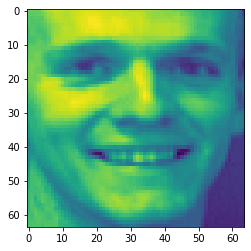

In [4]:
image = faces_data.data[42].reshape(64, 64)
plt.imshow(image)

In [5]:
df = cali_housing.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Principal Component Analysis 

Recall the steps to perform Principal Component Analysis on an array.  

```
- standardize the data
- perform SVD
- select how many components to keep
```

From here, depending on the goal you will either eliminate all but the top `r` values in $\Sigma$ or evaluate the product of $U_r \dot \Sigma_r$.

[Back to top](#Index:) 

## Problem 1

### Function to Standardize and Factor

**4 Points**

Complete the function svd_norm below.  This function takes in an array, scales the values, and returns three arrays as a result of the singular value decomposition on the scaled array, $U, \Sigma, VT$.  


In [6]:
### GRADED

def svd_norm(X):
    """This function takes in an array X, scales it according 
    to the transformation X - mu / sigma where mu is the mean
    and sigma the standard deviation of the dataset.

    Parameters
    ----------
    X: type `np.array`, shape (N, M)
        
    Returns
    -------
    A tuple (U, Sigma, VT) where
        U: type `np.ndarray`, shape (N, M)
            Numpy arrays with N rows, M columns 
        Sigma: type `np.ndarray`, shape (M, M)
            Numpy arrays with M rows and M columns
            A Diagonal matrix with the singular values on main diagonal
        VT: type `np.ndarray`, shape (M, M)
            Numpy array with M rows and M columns representing V Transpose
    """
    return None


# YOUR CODE HERE
def svd_norm(X):
    mu = X.mean()
    sigma = X.std()
    Xnorm = (X - mu)/sigma
    U, s, VT = svd(Xnorm, full_matrices=False)
    Sigma = np.diag(s)
    return U, Sigma, VT

#raise NotImplementedError()

# Answer check
U, Sigma, VT = svd_norm(image)
print(U.shape, Sigma.shape, VT.shape)

(64, 64) (64, 64) (64, 64)


In [7]:
Sigma_copy = np.copy(Sigma)
Sigma_copy[5:, 5:] = 0
Sigma_copy

array([[42.58563 ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      , 38.270905,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      , 17.66429 , ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ]], dtype=float32)

[Back to top](#Index:) 

## Problem 2

### Reconstructing the Image

**4 Points**

Below, create a copy of the $\Sigma$ matrix with `np.copy` and assign it to `Sigma_copy` below.  Set all but the first 25 singular values to zero.  Reconstruct the original image by multiplying $U \Sigma_{copy} VT$ and assign to `simpler_image`.  Note how much information from the image is captured in the first five singular values!

(64, 64)


Text(0.5, 1.0, 'Image Reconstructed from first 5 Singular Values')

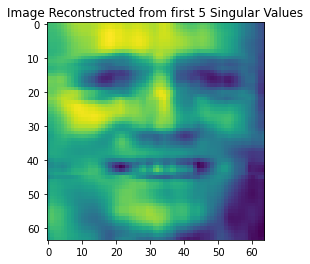

In [8]:
### GRADED

Sigma_copy = None
simpler_image = None

# YOUR CODE HERE
Sigma_copy = np.copy(Sigma)
Sigma_copy[5:, 5:] = 0
simpler_image = U @ Sigma_copy @ VT

#raise NotImplementedError()

# Answer check
print(simpler_image.shape)
plt.imshow(simpler_image)
plt.title('Image Reconstructed from first 5 Singular Values')

[Back to top](#Index:) 

## Problem 3

### Repeat for Tabular Data

**4 Points**

As the example above demonstrates, using Principal Component Analysis is a way of extracting important information from the data through the SVD.  Now, you are to extract the matrix factorization from the SVD using the housing data `df`.  The earlier `svd_norm` function should work to factor a DataFrame.  Use your function to extract $U, \Sigma, VT$ from the DataFrame.  Assign your results to `U, Sigma, VT` below.

In [9]:
### GRADED

U, Sigma, VT = None, None, None

# YOUR CODE HERE
U, Sigma, VT = svd_norm(df)
#raise NotImplementedError()

# Answer check
print(type(U))
print(df.shape, Sigma.shape)

<class 'numpy.ndarray'>
(20640, 9) (9, 9)


In [10]:
U[:,:2]

array([[-0.01144494,  0.00171578],
       [-0.00859083,  0.00216985],
       [-0.01136578, -0.00062506],
       ...,
       [-0.0033526 , -0.01018633],
       [-0.00404058, -0.0102679 ],
       [-0.00376259, -0.00907682]])

[Back to top](#Index:) 

## Problem 4

## Function to project into lower dimension `r`

**4 Points**

Complete the function `pca` below.  This function takes two arguments, `X` and `r` where `X` is an array or DataFrame and `r` is dimension to project the data down into.  The function should return a `DataFrame` with columns labeled `['pca_1', 'pca_2', ..., 'pca_r']`.  

In [15]:
['pca_' + str(x) for x in range(1,5+1)]
df.iloc[:,:5]

,MedInc,HouseAge,AveRooms,AveBedrms,Population
0,8.3252,41.0,6.984127,1.023810,322.0
1,8.3014,21.0,6.238137,0.971880,2401.0
2,7.2574,52.0,8.288136,1.073446,496.0
3,5.6431,52.0,5.817352,1.073059,558.0
4,3.8462,52.0,6.281853,1.081081,565.0
...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0
20636,2.5568,18.0,6.114035,1.315789,356.0
20637,1.7000,17.0,5.205543,1.120092,1007.0
20638,1.8672,18.0,5.329513,1.171920,741.0


In [20]:
### GRADED

def pca(X, r = 5):
    """This function takes in an array X, and extracts
    r principal components.  These are returned in a DataFrame.

    Parameters
    ----------
    X: type `np.array`, shape (N, M)
    r: type `int`
        
    Returns
    -------
    A DataFrame of shape (N, r) with columns labeled
    pca_1. | pca_2 | .... | pca_r |
    
    """
    return None

# YOUR CODE HERE
def pca(X, r = 5):
    U, sigma, VT = svd(X, full_matrices=False)
    Sigma = np.diag(sigma)
    return pd.DataFrame(U[:, :r] @ Sigma[:r, :r], columns = ['pca_' + str(x) for x in range(1,r+1)])

#raise NotImplementedError()
XT = pca(df, r = 2)
print(XT.shape)
XT.head()

(20640, 2)


,pca_1,pca_2
0,-328.864961,116.866296
1,-2404.512621,-2.203910
2,-502.725610,110.244305
3,-564.624057,106.700353
4,-571.611024,106.278334


[Back to top](#Index:) 

## Problem 5

### Converting a New Datapoint

**4 Points**

Suppose we have a new house given by the DataFrame below:

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>MedInc</th>      <th>HouseAge</th>      <th>AveRooms</th>      <th>AveBedrms</th>      <th>Population</th>      <th>AveOccup</th>      <th>Latitude</th>      <th>Longitude</th>      <th>MedHouseVal</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>3.87</td>      <td>28.64</td>      <td>5.43</td>      <td>1.1</td>      <td>1425.48</td>      <td>3.07</td>      <td>35.63</td>      <td>-119.57</td>      <td>2.07</td>    </tr>  </tbody></table>

Use your `pca` function to project this new house into 2 dimensions.  First, scale your data according to the mean and standard deviation of `df`.  Assign the normalized data to `normed_newhome` below.  Assign the results of the pca transformation on the scaled house data as a DataFrame with columns `pca_1` and `pca_2` to `ans5` below.

In [23]:
### GRADED
newhome = pd.DataFrame([[3.87, 28.64, 5.43, 1.1, 1425.48, 3.07, 35.63, -119.57, 2.07]], columns = df.columns)
newhome


normed_newhome = None
ans_5 = None

# YOUR CODE HERE
#raise NotImplementedError()
# scale newhome
mu = df.mean()
s = df.std()
normed_newhome = (newhome - mu) / s
# get df's VT
#U, sigma, VT = svd(df, full_matrices=False)
U, sigma, VT = svd_norm(df)

# PCA transformation
ans5 = normed_newhome @ VT.T[:, :2]
ans5.columns = ['pca_' + str(x) for x in range(1,2+1)]

print(ans5.shape)
print(type(ans5))
ans5

(1, 2)
<class 'pandas.core.frame.DataFrame'>


,pca_1,pca_2
0,-0.00336,0.002261


Both of these examples offer insight to how PCA can reduce the dimensionality of your data while keeping important information about underlying relationships in tact.  